<a href="https://colab.research.google.com/github/KazaGeetanjali/GIScode/blob/main/PS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **RESEARCH INTEREST**

 The term Fortune refers to a list of the largest companies compiled by Fortune magazine every year. Companies are ranked by their annual revenues for their respective fiscal years. This list includes both public and private companies using publicly available revenue data. A job with a Fortune employer is a different world from most other employers. Usually, Company names are very well known, across many states or even the globe. That can be very good for one's career. Some of these companies are so consistent with their annual revenues that they understand that their workforce is a key to their success. Many of the Fortune are included on the CNN Money’s list of best companies to work for.

### ***PROJECT***

In this project we will see the graphical representation of Fortune with respect there revenues, profits, number of employees and many other factors in each organization.

**Data Source:** Utilizing data from someka, website which has the CSV file with the Rank, Revenues, Revenue Change, Profits, Profit Change, Assets,Number of Employees, women ceo's and many other factors of the Fortune companies

**Datalink:**
Fortune Website: https://fortune.com/

Texas Attracts Big Businesses: https://www.cnbc.com/2021/03/20/how-texas-attracts-big-businesses-billionaires-from-california.html

Women CEO : https://fortune.com/2021/06/02/female-ceos-fortune-500-2021-women-ceo-list-roz-brewer-walgreens-karen-lynch-cvs-thasunda-brown-duckett-tiaa/

Financial Sector: https://www.investopedia.com/terms/f/financial_sector.asp

Holding Company: https://www.investopedia.com/terms/h/holdingcompany.asp

New York Job Openings: https://cityjobs.nyc.gov/

Additional New job data: https://data.cityofnewyork.us/City-Government/NYC-Jobs/pda4-rgn4/data

**Data Year:** 2022

In [ ]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis
import folium
import plotly.express as px

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

import plotly.offline as py
import seaborn as sns
import numpy as np # linear algebra
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
!pip install mapclassify
import mapclassify #need for thematic map classification

In [ ]:
from shapely.geometry import Point

In [ ]:
import plotly.tools as tls
from plotly.offline import init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)
plt.style.use('ggplot')
from geopy.geocoders import Nominatim
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
import geopandas as gpd
import plotly.figure_factory as ff
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models import word2vec
import nltk
from collections import Counter
from wordcloud import WordCloud
from PIL import Image
import urllib.request
import random

In [ ]:
!pip install squarify
import squarify

In [ ]:
! wget -q -O us_state.zip https://docs.google.com/uc?id=18UaMlNnNUXeoLAmfWQ8JYWoT7bprJdC4&export=download

zip_ref = zipfile.ZipFile('us_state.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
us_map=gpd.read_file('cb_2018_us_state_500k.shp') #load the shapefile with gpd as world_boundaries
us_cont = us_map[~us_map['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico','American Samoa','United States Virgin Islands','Guam','Commonwealth of the Northern Mariana Islands'])]

In [ ]:
us_cont.columns

Index(['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STUSPS', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')

In [ ]:
! wget -q -O Fortune_1000.csv  https://raw.githubusercontent.com/KazaGeetanjali/GIScode/main/Fortune_1000.csv

Fortune_1000 = pd.read_csv("Fortune_1000.csv", encoding='latin1') #reading the file from GIThub and encoding the special characters present in the file
Fortune_1000.dataframeName = 'Fortune_1000.csv'
nRow, nCol = Fortune_1000.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 18 columns


In [ ]:
# Preview data set in order to identify any null values and errors.
print(Fortune_1000.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            1000 non-null   object 
 1   rank               1000 non-null   int64  
 2   rank_change        1000 non-null   float64
 3   revenue            1000 non-null   float64
 4   profit             997 non-null    float64
 5   num. of employees  999 non-null    float64
 6   sector             1000 non-null   object 
 7   city               1000 non-null   object 
 8   state              1000 non-null   object 
 9   newcomer           1000 non-null   object 
 10  ceo_founder        1000 non-null   object 
 11  ceo_woman          1000 non-null   object 
 12  profitable         1000 non-null   object 
 13  prev_rank          1000 non-null   object 
 14  CEO                1000 non-null   object 
 15  Website            1000 non-null   object 
 16  Ticker             951 no

In [ ]:
# Remove white space around column names. Convert all column names into lowercase.
Fortune_1000.columns = Fortune_1000.columns.str.strip().str.lower()

In [ ]:
# Private corporations have null values in the 'ticker symbol' column. Null values are replaced with N/A in to prevent any errors during analysis
Fortune_1000['ticker'].fillna('N/A', inplace= True)

In [ ]:
Fortune_1000

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,ceo,website,ticker,market cap
0,Walmart,1,0.0,572754.0,13673.0,2300000.0,Retailing,Bentonville,AR,no,no,no,yes,1.0,C. Douglas McMillon,https://www.stock.walmart.com,WMT,352037
1,Amazon,2,0.0,469822.0,33364.0,1608000.0,Retailing,Seattle,WA,no,no,no,yes,2.0,Andrew R. Jassy,www.amazon.com,AMZN,1202717
2,Apple,3,0.0,365817.0,94680.0,154000.0,Technology,Cupertino,CA,no,no,no,yes,3.0,Timothy D. Cook,www.apple.com,AAPL,2443962
3,CVS Health,4,0.0,292111.0,7910.0,258000.0,Health Care,Woonsocket,RI,no,no,yes,yes,4.0,Karen Lynch,https://www.cvshealth.com,CVS,125204
4,UnitedHealth Group,5,0.0,287597.0,17285.0,350000.0,Health Care,Minnetonka,MN,no,no,no,yes,5.0,Andrew P. Witty,www.unitedhealthgroup.com,UNH,500468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Vizio Holding,996,0.0,2124.0,-39.4,800.0,Industrials,Irvine,CA,no,yes,no,no,,William W. Wang,https://www.vizio.com,VZIO,1705.1
996,1-800-Flowers.com,997,0.0,2122.2,118.7,4800.0,Retailing,Jericho,NY,no,no,no,yes,,Christopher G. McCann,https://www.1800flowers.com,FLWS,830
997,Cowen,998,0.0,2112.8,295.6,1534.0,Financials,New York,NY,no,no,no,yes,,Jeffrey Solomon,https://www.cowen.com,COWN,1078
998,Ashland,999,0.0,2111.0,220.0,4100.0,Chemicals,Wilmington,DE,no,no,no,yes,,Guillermo Novo,https://www.ashland.com,ASH,5601.9


In [ ]:
#Replace null values for the CEO column for ploting.
Fortune_1000['ceo'].fillna('N/A', inplace = True)
Fortune_1000['profit'] = Fortune_1000['profit'].fillna(value = 0)
Fortune_1000['num. of employees'] = Fortune_1000['num. of employees'].fillna(value = 0)
Fortune_1000['market cap'] = Fortune_1000['market cap'].fillna(value = 0)

In [ ]:
#Replacing for ploting.
Fortune_1000['market cap']=Fortune_1000['market cap'].replace(['-'], '0')

In [ ]:
#Added missing profit values for the company Hexion.
print(Fortune_1000.loc[Fortune_1000['company']== 'Hexion'])
Fortune_1000.at[716,'profit'] = -230

Empty DataFrame
Columns: [company, rank, rank_change, revenue, profit, num. of employees, sector, city, state, newcomer, ceo_founder, ceo_woman, profitable, prev_rank, ceo, website, ticker, market cap]
Index: []


In [ ]:
# Removed iheartmedia from dataframe as missing information could not be located for the company.
print(Fortune_1000.loc[Fortune_1000['company']== 'iHeartMedia'])
Fortune_1000= Fortune_1000.drop(Fortune_1000.index[667])

         company  rank  rank_change  revenue  profit  num. of employees  \
741  iHeartMedia   742          0.0   3558.3  -159.2             9990.0   

    sector         city state newcomer ceo_founder ceo_woman profitable  \
741  Media  San Antonio    TX       no          no        no         no   

    prev_rank                ceo                      website ticker  \
741            Robert W. Pittman  https://www.iheartmedia.com   IHRT   

    market cap  
741     2728.1  


In [ ]:
# Change the datatype in the profit column to numerical.
Fortune_1000['profit']= Fortune_1000['profit'].astype(float)
Fortune_1000['market cap']=Fortune_1000['market cap'].astype(float)

In [ ]:
# Change data types in several columns to categorical data.
Fortune_1000['ceo_woman'] = np.where(Fortune_1000['ceo_woman'] == 'yes', True, False)
Fortune_1000['ceo_founder']=np.where(Fortune_1000['ceo_founder']== 'yes', True, False)
Fortune_1000['newcomer']= np.where(Fortune_1000['newcomer']== 'yes', True, False)
Fortune_1000['profitable']=np.where(Fortune_1000['profitable']=='yes', True, False)

In [ ]:
# Check for anymore null values.
Fortune_1000.isnull().any()

company              False
rank                 False
rank_change          False
revenue              False
profit               False
num. of employees    False
sector               False
city                 False
state                False
newcomer             False
ceo_founder          False
ceo_woman            False
profitable           False
prev_rank            False
ceo                  False
website              False
ticker               False
market cap           False
dtype: bool

In [ ]:
#Check to make sure data types where updated properly.
print(Fortune_1000.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            999 non-null    object 
 1   rank               999 non-null    int64  
 2   rank_change        999 non-null    float64
 3   revenue            999 non-null    float64
 4   profit             999 non-null    float64
 5   num. of employees  999 non-null    float64
 6   sector             999 non-null    object 
 7   city               999 non-null    object 
 8   state              999 non-null    object 
 9   newcomer           999 non-null    bool   
 10  ceo_founder        999 non-null    bool   
 11  ceo_woman          999 non-null    bool   
 12  profitable         999 non-null    bool   
 13  prev_rank          999 non-null    object 
 14  ceo                999 non-null    object 
 15  website            999 non-null    object 
 16  ticker             999 non

## Where are most Fortune 1000 companies

In [ ]:
state_count= Fortune_1000[['sector','company','state']]
state_count = state_count.groupby(["state"], as_index = False)["company"].count()
state_count.rename(columns = {'company':'company_count'}, inplace=True)
state_count.sort_values(by='company_count',ascending=False,inplace=True)
state_count.head(10)

,state,company_count
3,CA,131
40,TX,97
31,NY,87
13,IL,62
32,OH,54
35,PA,45
8,FL,38
42,VA,34
9,GA,34
18,MA,33


In [ ]:
us_cont['STUSPS'] = us_cont['STUSPS'].str.upper().str.replace(' ', '') #making the column data similar to the other data to merge on this column
Fortune_1000['state'] = Fortune_1000['state'].str.upper().str.replace(' ', '') #turning the column data to upper case and replacing special charaters with no space

In [ ]:
us_cont = us_cont.rename(columns = {'STUSPS':'state'}) #replacing the column name to create merge
us_cont.columns #printing the column names after renaming

Index(['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'state', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')

In [ ]:
Fortune_outer_join = pd.merge(us_cont, state_count, on = 'state', how = 'outer', indicator = False) #outer merge

In [ ]:
Fortune_outer_join[['state','company_count']]

,state,company_count
0,MS,1.0
1,NC,28.0
2,OK,8.0
3,VA,34.0
4,WV,NaN
5,LA,5.0
6,MI,31.0
7,MA,33.0
8,ID,4.0
9,FL,38.0


In [ ]:
Fortune_outer_join['company_count'] = Fortune_outer_join['company_count'].fillna(value = 0)

In [ ]:
Fortune_outer_join[['state','company_count']]

,state,company_count
0,MS,1.0
1,NC,28.0
2,OK,8.0
3,VA,34.0
4,WV,0.0
5,LA,5.0
6,MI,31.0
7,MA,33.0
8,ID,4.0
9,FL,38.0


<Axes: >

[]

[]

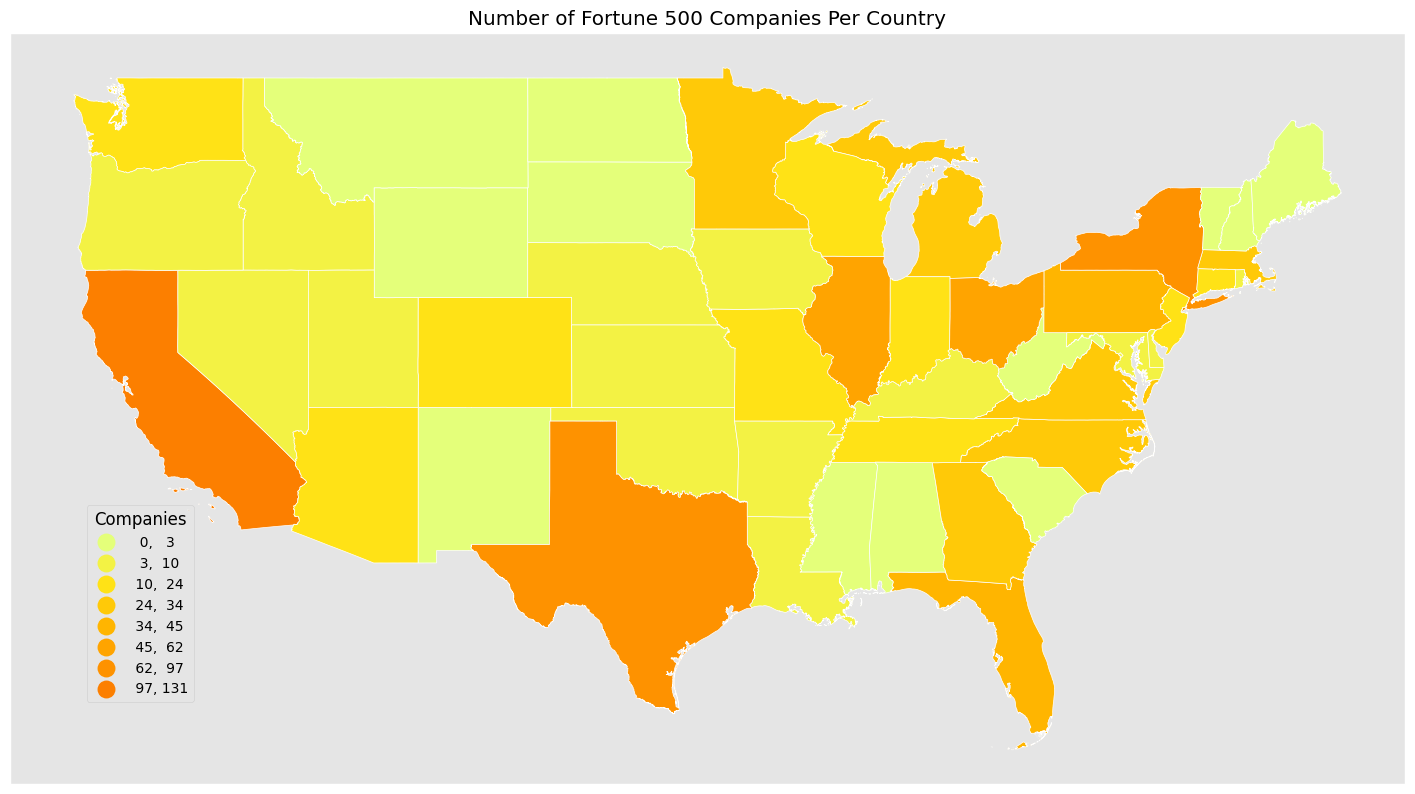

In [ ]:
fig, ax = plt.subplots(figsize=(18,12))
Fortune_outer_join.plot(ax=ax,
                        column='company_count',
                        legend=True,
                        cmap='Wistia',
                        scheme='natural_breaks',
                        k=8,
                        edgecolor='w',
                        linewidth=0.5,
                        legend_kwds= {'bbox_to_anchor': (0.05, 0.1),
                        "fmt": "{:,.0f}",'markerscale':1.29,
                        'title_fontsize':'large',
                        'fontsize':10,'loc':'lower left'})

leg1 = ax.get_legend()
leg1.set_title("Companies")
ax.title.set_text("Number of Fortune 500 Companies Per Country")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
plt.show()

The data shows that California, Texas, and New York are the states with the most Fortune 1000 companies. These three states are also amongst the most populated states in the United States, which each state having over 19 million residents. It makes sense for businesses to be in highly populated regions like California and New York. It is easier to find talent in populous cities as well as a large pool of clients. California and New York are known for high housing costs and taxes. This has led many businesses to move to states like Texas and Florida

## How many companies have women CEOs

In [ ]:
woman_df = Fortune_1000[['sector','company','ceo_woman']]
woman_df = Fortune_1000[Fortune_1000['ceo_woman']==True]
woman_df=woman_df.groupby(["sector"], as_index=False)[
    "ceo_woman"].count().sort_values(by='ceo_woman',ascending=False)
woman_df

,sector,ceo_woman
16,Retailing,14
6,Financials,12
4,Energy,9
9,Health Care,9
17,Technology,7
0,Aerospace & Defense,4
11,Household Products,4
13,Materials,4
12,Industrials,4
18,Transportation,2


From the one thousand companies that are feature in Fortune’s list, a mere 8% of those companies have a woman CEO.

<BarContainer object of 20 artists>

Text(0.5, 1.0, 'Number of Women CEOs per Sector')

Text(3, 10, '\n    In the Fortune 1000 list of companies,\n    only 8.0% of the CEOs are women\n    and 17.0% of those women are in the retail sector.\n    ')

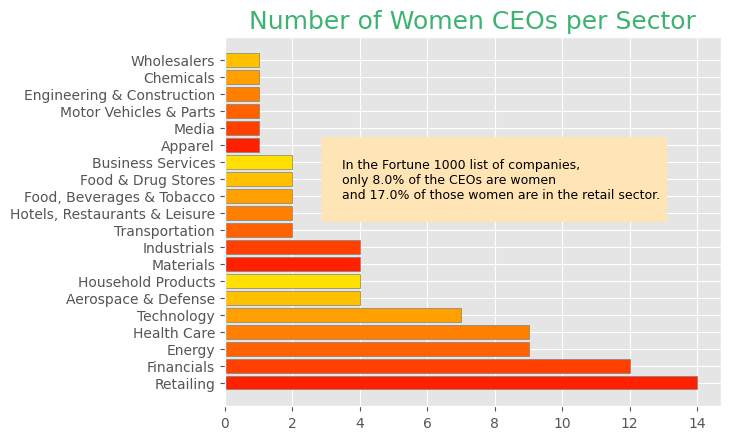

In [ ]:
y = woman_df['sector']
width = woman_df['ceo_woman']
palette = sns.color_palette("autumn", 7)
plt.barh(y=y, width=width, color=palette, edgecolor='Gray')
plt.title('Number of Women CEOs per Sector', fontsize=18,
          color = 'MediumSeaGreen')
percent_woman = round((woman_df['ceo_woman'].sum()/1000 *100),0)
percent_retail = round((woman_df.iloc[0,1]/woman_df['ceo_woman'].sum()*100),0)
plt.annotate(text=(
    '''
    In the Fortune 1000 list of companies,
    only {pw}% of the CEOs are women
    and {pr}% of those women are in the retail sector.
    '''.format(
      pw=percent_woman, pr=percent_retail)), xy=(3,10), fontsize=9,
backgroundcolor='Moccasin')

Jane Fraser, Chief Executive Officer of Citi, is the first woman CEO in the firm’s history. The finance company serves millions of consumers, businesses, and institutions across 160 countries. Jane Fraser has been with Citi for 17 years before being appointed as CEO. Safra A. Catz has served as chief executive officer of Oracle Corporation since 2014. She began working at Oracle in 1999. Interestingly, Oracle is one of the many tech companies that moved its headquarters from California to Austin, Texas. Mary T. Barra is the only woman CEO in the dataset within the motor vehicles sector. Barra has been the chair and chief executive officer of General Motors since January 15, 2014. She has been with General Motors for more than thirty years and the CEO for over seven years. More diversity is necessary in the business world. Although the number of women running Fortune 500 businesses hit a record in 2021, there is still a very large gap between the number of men that are CEOs (93%) and the number of women that are CEOs. As for racial diversity, this year marks the first time that two Black women, Roz Brewer and Thasunda Brown, are running Fortune 500 businesses. Before being appointed the CEO of Walgreens Boots Alliance, Roz Brewer served as the COO of Starbucks and CEO of Sam’s Club. Accomplished businesswoman, Thasunda Brown Duckett, was the CEO of Chase Consumer Banking for over four years. In May 2021, she became the CEO of the Teachers Insurance and Annuity Association of America (TIAA).

In [ ]:
woman_ceo = Fortune_1000[['company','profit','sector','ceo_woman','ceo']]
woman_ceo = woman_ceo[woman_ceo['ceo_woman']== True].sort_values(by='profit', ascending=False)
woman_ceo.head(10)

,company,profit,sector,ceo_woman,ceo
43,Citigroup,21952.0,Financials,True,Jane Fraser
90,Oracle,13746.0,Technology,True,Safra A. Catz
33,United Parcel Service,12890.0,Transportation,True,Carol B. TomÃ©
24,General Motors,10019.0,Motor Vehicles & Parts,True,Mary T. Barra
3,CVS Health,7910.0,Health Care,True,Karen Lynch
100,Northrop Grumman,7005.0,Aerospace & Defense,True,Kathy J. Warden
19,Elevance Health,6104.0,Health Care,True,Gail K. Boudreaux
89,TIAA,4060.7,Financials,True,Thasunda Brown Duckett
144,Duke Energy,3908.0,Energy,True,Lynn J. Good
78,Progressive,3350.9,Financials,True,Susan Patricia Griffith


## Which sectors are the most profitable
The sectors that are the most profitable within Fortune 1000 are financials, technology, and healthcare. The financial sector is made up of firms and institutions that provide financial services. Banks, investment companies and insurance companies make up the financial sector. It is important that the financial sector remains profitable as its strength is a sign of a healthy economy [10]. The most profitable company in the list is Berkshire Hathway, a conglomerate holding company. Holding companies’ primary business is holding a controlling interest in the securities of other companies [11]. It is no surprise that the technology sector is rapidly growing in the United States. The technology sector is comprised of companies that develop software and companies that provide information technology consulting and services. According to Fidelity Investments, the tech sector has increased 265.67% over the last five years

In [ ]:
# Top performing Sector
sector_df=Fortune_1000[['company','profit','sector']]
sector_sum_df=sector_df.groupby(['sector'], as_index = False).sum('profit').sort_values(
    by=['profit'], ascending = False)

sector_sum_df.rename(columns = {
    'sector':'sector',
    'profit':'sum_profit'}, inplace = True)
sector_profit = sector_sum_df
sector_sum_df = sector_sum_df.head(5)

sector_sum_df.head(3)

,sector,sum_profit
6,Financials,556324.0
17,Technology,459503.3
9,Health Care,209021.4


<Axes: >

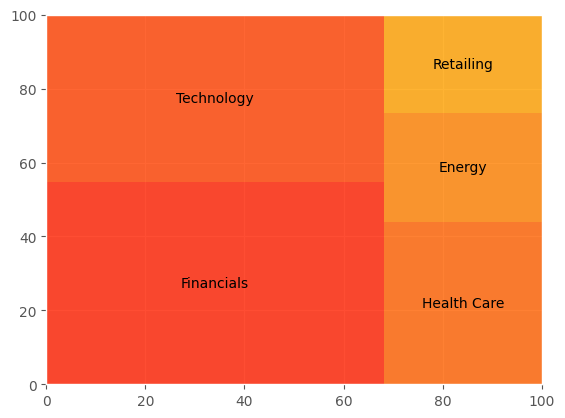

In [ ]:
squarify.plot(sizes=sector_sum_df['sum_profit'],
              label=sector_sum_df['sector'],
              alpha=0.8,
              text_kwargs={'fontsize':10},
              color=palette)

Creating mean, maximum, minimum, standard deviation with respective to the fields profit, revenue, number of employees

In [ ]:
Fortune_1000.loc[:, ["profit","revenue","num. of employees"]].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='green')

,count,mean,std,min,25%,50%,75%,max
num. of employees,999.000000,35773.653654,104658.710514,0.000000,6497.500000,13525.000000,28900.000000,2300000.000000
revenue,999.000000,18000.550951,40831.406707,2107.200000,3499.900000,6394.000000,14619.050000,572754.000000
profit,999.000000,2021.686386,6416.001517,-6520.000000,192.000000,571.200000,1493.150000,94680.000000


Dividing the webiste field

In [ ]:
df1=Fortune_1000['website'].str.split('.',expand = True)
df1

,0,1,2,3
0,https://www,stock,walmart,com
1,www,amazon,com,None
2,www,apple,com,None
3,https://www,cvshealth,com,None
4,www,unitedhealthgroup,com,None
...,...,...,...,...
995,https://www,vizio,com,None
996,https://www,1800flowers,com,None
997,https://www,cowen,com,None
998,https://www,ashland,com,None


Creating heat map using the fields rank, rank change, revenue, profit, number of employees, sector, market cap

In [ ]:
def preprocess_inputs(df):

    # Drop Columns
    df_drop = df.drop(['rank', 'rank_change', 'company', 'newcomer', 'prev_rank', 'CEO', 'Website', 'Ticker'], axis=1)

    # Filling Missing value
    df_drop["profit"] = df_drop["profit"].fillna(df_drop["profit"].mean())
    df_drop["num. of employees"] = df_drop["num. of employees"].fillna(df_drop["num. of employees"].mean())

    # Encode missing values
    df_drop['Market Cap'] = df_drop['Market Cap'].replace('-',np.NaN).astype(np.float)

    # Drop missing Target
    missing_target_rows = df_drop[df_drop['Market Cap'].isna()].index
    df_drop = df_drop.drop(missing_target_rows, axis=0).reset_index(drop=True)

    # Binary encoding
    for column in ['ceo_founder', 'ceo_woman', 'profitable']:
        df_drop[column] = df_drop[column].replace({'no': 0, 'yes': 1})

    # One-hot encoding
    for column in ['sector', 'city', 'state']:
        dummies = pd.get_dummies(df_drop[column], prefix=column)
        df_drop = pd.concat([df_drop, dummies], axis=1)
        df_drop = df_drop.drop(column, axis=1)

    df1= df_drop.copy()

    # Train-test split
    X = df_drop.drop("Market Cap",axis = 1)
    y = df_drop["Market Cap"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

    return X_train, X_test, y_train, y_test

<Axes: >

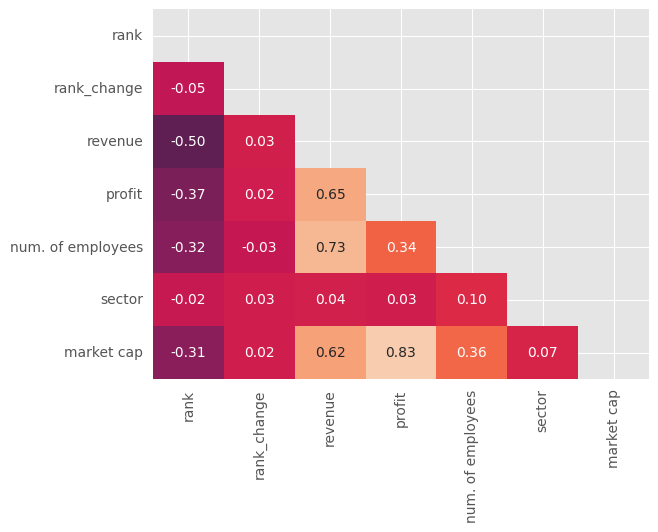

In [ ]:
corr_matrix=Fortune_1000.select_dtypes(np.number).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, mask=mask, vmin=-1, vmax=1, fmt=".2f", cbar=False)

plt.show()

In this correlation heatmap, each variable is represented by a row and a column, and the cells show the correlation between them. The color of each cell represents the strength and direction of the correlation, with darker colors indicating stronger correlations. It shows the correlation between fields like rank, rank_change,revenue, profit, number of employees, sector, market cap. The least lies with revenue with -0.50 and the highest lies with the profit of 0.83

## Which state stands in top considering all the factors

<Axes: >

(0.0, 1.0, 0.0, 1.0)

<Axes: >

(0.0, 1.0, 0.0, 1.0)

<Axes: >

(0.0, 1.0, 0.0, 1.0)

<Axes: >

(0.0, 100.0, 0.0, 100.0)

[]

[]

[]

[]

[]

[]

[]

[]

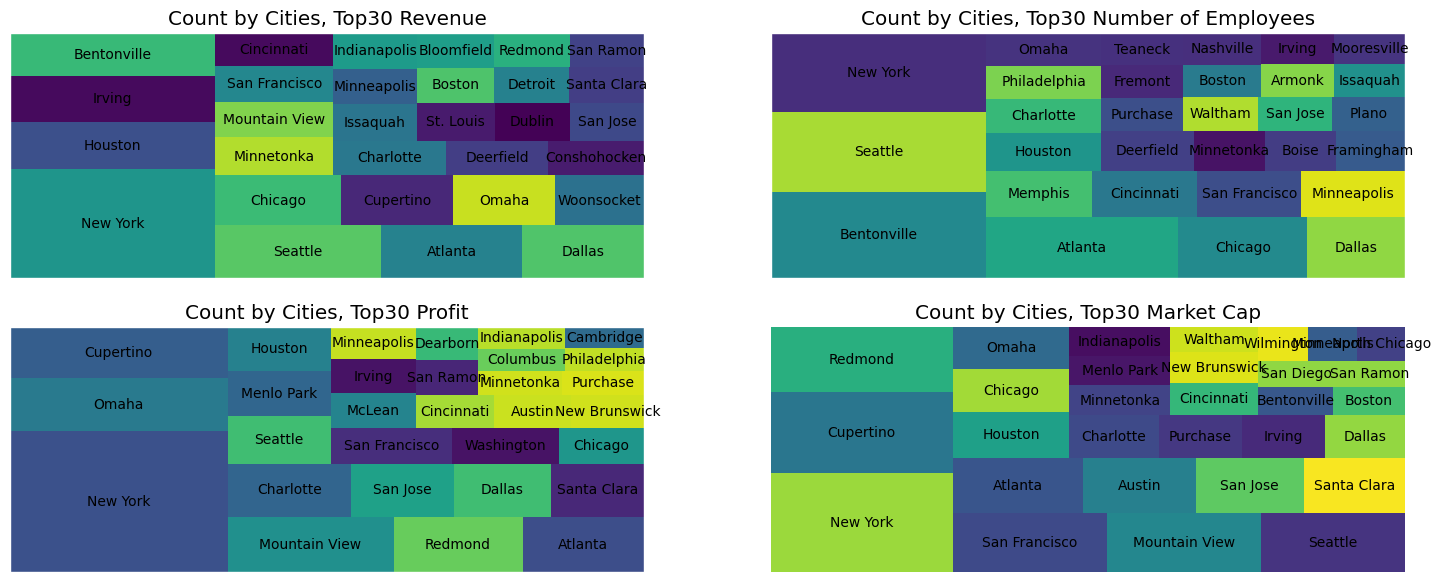

In [ ]:
fig, ([ax1,ax2],[ax3,ax4]) = plt.subplots( 2, 2, figsize=(18,7))

df_city_revenue=pd.DataFrame(Fortune_1000.groupby('city')['revenue'].sum().sort_values(ascending=False).head(30))

x1 = df_city_revenue['revenue']
label1 = df_city_revenue.index
squarify.plot(x1,ax= ax1, label=label1)
plt.axis('off')

df_city_employees=pd.DataFrame(Fortune_1000.groupby('city')['num. of employees'].sum().sort_values(ascending=False).head(30))

x2 = df_city_employees['num. of employees']
label2 = df_city_employees.index
squarify.plot(x2,ax= ax2, label=label2)
plt.axis('off')

df_city_profit=pd.DataFrame(Fortune_1000.groupby('city')['profit'].sum().sort_values(ascending=False).head(30))

x3 = df_city_profit['profit']
label3 = df_city_profit.index
squarify.plot(x3,ax= ax3, label=label3)
plt.axis('off')

df_city_market_cap=pd.DataFrame(Fortune_1000.groupby('city')['market cap'].sum().sort_values(ascending=False).head(30))

x4 = df_city_market_cap['market cap']
label4 = df_city_market_cap.index
squarify.plot(x4,ax= ax4, label=label4)
plt.axis('off')

ax1.title.set_text("Count by Cities, Top30 Revenue")
ax1.set_xticks([]) #kills xticks
ax1.set_yticks([]) #kills xticks
ax2.title.set_text("Count by Cities, Top30 Number of Employees")
ax2.set_xticks([]) #kills xticks
ax2.set_yticks([]) #kills xticks
ax3.title.set_text("Count by Cities, Top30 Profit")
ax3.set_xticks([]) #kills xticks
ax3.set_yticks([]) #kills xticks
ax4.title.set_text("Count by Cities, Top30 Market Cap")
ax4.set_xticks([]) #kills xticks
ax4.set_yticks([]) #kills xticks

The data shows that New York is the state with the most Fortune 1000 companies that stood in top 5 for following categories like revenue,profit, number of employees in a company, market cap. As this state has one of the largest population resulting in huge market flow, more job openings and less unemployment rate in the United States. It is easier to find talent in populous cities as well as a large pool of clients. Hence looking on the analysis of jobs in New york in next maps.

## Which career level has the highest paid salary and number of positions that are open

In [ ]:
! wget -q -O NYC.zip https://docs.google.com/uc?id=1cg3dvf2upDrCMCylo6mtU0byimlE6Uvy&export=download
zip_ref = zipfile.ZipFile('NYC.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
nyc_jobs=gpd.read_file('NYC_Jobs.csv') #load the shapefile with gpd as world_boundaries
nyc_jobs.head(5)

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date,geometry
0,424339,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Triage Nurse, Bureau of Public Health Clinics",PUBLIC HEALTH NURSE,Competitive-1,51011,03,Health,...,Apply online with a cover letter to https://a1...,,,,New York City Residency is not required for th...,03/01/2022,,04/05/2022,04/12/2022,None
1,379094,NYC EMPLOYEES RETIREMENT SYS,External,1,CERTIFIED IT DEVELOPER (APPLICATIONS),CERT IT DEVELOPER (APP),Competitive-1,13643,02,"Technology, Data & Innovation",...,"TO APPLY FOR CONSIDERATION, PLEASE FORWARD A C...",,,,New York City Residency is not required for th...,01/07/2019,,01/07/2019,04/12/2022,None
2,520417,NYC HOUSING AUTHORITY,External,1,Chief of Settlement,EXECUTIVE AGENCY COUNSEL,Non-Competitive-5,95005,M2,Legal Affairs,...,Click the Apply Now button.,,,,NYCHA has no residency requirements.,03/28/2022,,03/28/2022,04/12/2022,None
3,233549,NYC EMPLOYEES RETIREMENT SYS,External,1,"CERTIFIED IT ADMINISTRATOR (LAN/WAN), LEVEL 4",CERTIFIED IT ADMINISTRATOR (LA,Competitive-1,13652,04,Information Technology & Telecommunications,...,Click the 'apply now' button to apply. Please...,,,,New York City Residency is not required for th...,03/01/2016,,03/01/2016,04/12/2022,None
4,510256,HUMAN RIGHTS COMMISSION,External,5,Associate Human Rights Specialist,ASSOCIATE HUMAN RIGHTS SPECIAL,Competitive-1,55038,01,Constituent Services & Community Programs,...,For City employees: Go to Employee Self-Servic...,": DAY, 9-5; ON OCCASION, CANDIDATES MAY BE REQ...","22 Reade St, Ny",,New York City residency is generally required ...,12/16/2021,,12/16/2021,04/12/2022,None


In [ ]:
# Let's create a new dataset only contains annual salary
nyc_jobs_annual = nyc_jobs[nyc_jobs['Salary Frequency'] == 'Annual']
nyc_jobs_annual['Salary Range From'] = nyc_jobs_annual['Salary Range From'].astype(float)
nyc_jobs_annual['Salary Range To'] = nyc_jobs_annual['Salary Range To'].astype(float)

In [ ]:
# Calculate the average annual salary
nyc_jobs_annual['Average Annual Salary'] = (nyc_jobs_annual['Salary Range To'] + nyc_jobs_annual['Salary Range From']) / 2
# before making any plots, check a sample of the data for features of interest
features = ['Salary Range From','Salary Range To','Salary Frequency', 'Career Level', 'Average Annual Salary','Title Classification','Posting Type']
nyc_jobs_annual[features].head()

,Salary Range From,Salary Range To,Salary Frequency,Career Level,Average Annual Salary,Title Classification,Posting Type
0,84252.0,84252.0,Annual,Experienced (non-manager),84252.0,Competitive-1,External
1,82884.0,116391.0,Annual,Experienced (non-manager),99637.5,Competitive-1,External
2,105000.0,125000.0,Annual,Manager,115000.0,Non-Competitive-5,External
3,87203.0,131623.0,Annual,Experienced (non-manager),109413.0,Competitive-1,External
4,58449.0,67216.0,Annual,Experienced (non-manager),62832.5,Competitive-1,External


Over one million businesses exist in this city, with new ones cropping up constantly. Between remote work facilities and skyscrapers, there’s no shortage of places for businesses to expand as they grow and hire more people. The cost of living in NYC is something to consider. New York City apartments are notorious for high rent and small square footage. However, if you’re willing to lengthen your commute and live further out from the city center, you can decrease your cost of living and come out on top.

Created a scatter plot to show the relationship between number of positions and average annual salary for differet career levels


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='# Of Positions', ylabel='Average Annual Salary'>

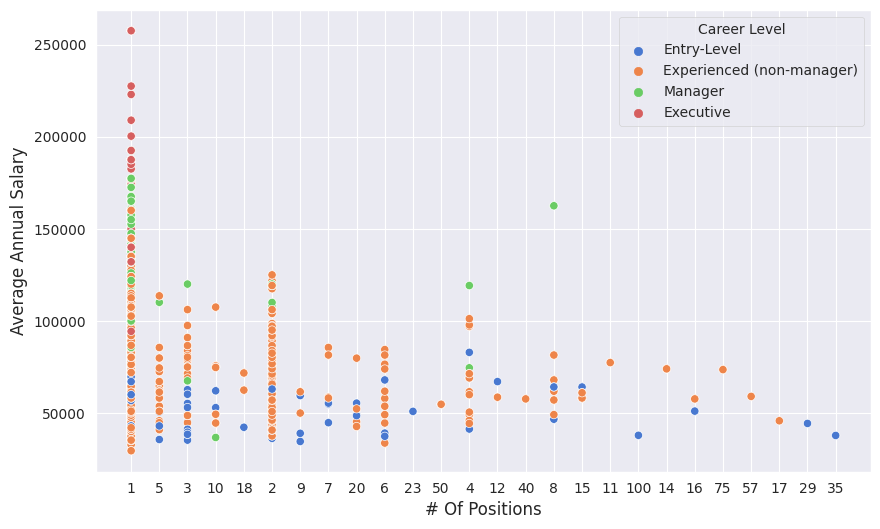

In [ ]:
plt.figure(figsize = (10,6))
sns.set_style('darkgrid')

hue_order = ['Entry-Level', 'Experienced (non-manager)', 'Manager', 'Executive']
sns.scatterplot(x = '# Of Positions', y = 'Average Annual Salary', data = nyc_jobs_annual, hue = 'Career Level', hue_order = hue_order, palette = 'muted', fc = 'none')

People at executive career level has the highest average annual salary with more than 250000 therefore having the least number of job openings of 1, interestingly there was a job opening for people who have experience but not at non manageral role have the least payed salary in 2022. There are more one position opening for all the career level in 2022 and there are 35 positions for entry level. The majority of the salary lies between the scale of 25000 to 100000.

Conclusion

Analyzing the companies featured in the Fortune 1000 list is a great way to get a snapshot of our economy. Through this exploratory analysis we have identified the regions in the US that are the most popular amongst Fortune companies. Unsurprisingly, large metropolitan areas like California and New York. However, states like Texas and Florida have seen a large increase in number of corporations. While the writers at Fortune, celebrate the inclusion of more women CEOs in the business world, it is evident that there is still a large gap as companies with women CEOs only make up 7%. we revealed that finance and technology are amongst the most profitable business sectors. Moreover New York has the highest number of employees, profit, revenue, market cap which indicates it has the lot of employement oportunity and most of the salaries between 50000 to 100000.